In [ ]:
from google.colab import drive
drive.mount('/content/drive/',force_remount=False)
import os
os.chdir("/content/drive/MyDrive/Python")
import pandas
import mba263
import matplotlib.pyplot as plt

Mounted at /content/drive/


In [ ]:
data = pandas.read_csv('/content/drive/MyDrive/Python/BBB.csv')

In [ ]:
data['female']=(data['gender']=="F")*1

In [ ]:
data['buyer_dummy']=(data['buyer']=="yes")*1

In [ ]:
result=mba263.logit(data['buyer_dummy'],data[ ['last','total_','female','child',
'youth','cook','do_it','refernce','art','geog'] ])
result.summary()
mba263.odds_ratios(result)

Optimization terminated successfully.
         Current function value: 0.241222
         Iterations 7


,Odds ratios,std err,z,P>|z|,[0.025,0.975]
last,0.909634,0.002540,35.575710,0.0,0.904707,0.914562
total_,1.001117,0.000198,5.627190,0.0,1.000732,1.001502
female,0.467330,0.016712,31.873279,0.0,0.434908,0.499751
child,0.830094,0.014346,11.843363,0.0,0.802263,0.857926
youth,0.893173,0.023320,4.580965,0.0,0.847933,0.938414
cook,0.763134,0.013071,18.121158,0.0,0.737776,0.788493
do_it,0.583235,0.015727,26.499322,0.0,0.552724,0.613746
refernce,1.264514,0.033583,7.876323,0.0,1.199362,1.329665
art,3.175878,0.070327,30.939604,0.0,3.039444,3.312311
geog,1.775845,0.033086,23.449340,0.0,1.711658,1.840032


In [ ]:
data['predicted'] = result.predict()
result = 10 - mba263.ntile(data['predicted'],10)
data['purch_prob']=result

<AxesSubplot:xlabel='purch_prob'>

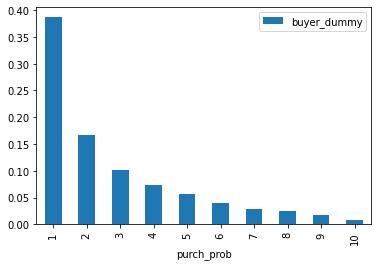

In [ ]:
data[['buyer_dummy','purch_prob']].groupby('purch_prob').mean().plot(kind='bar')

In [ ]:
data[['buyer_dummy','purch_prob'] ].groupby('purch_prob').describe()

buyer_dummy                                             
                 count      mean       std  min  25%  50%  75%  max
purch_prob                                                         
1               5000.0  0.387000  0.487112  0.0  0.0  0.0  1.0  1.0
2               5000.0  0.167200  0.373192  0.0  0.0  0.0  0.0  1.0
3               5000.0  0.102200  0.302941  0.0  0.0  0.0  0.0  1.0
4               5000.0  0.073600  0.261145  0.0  0.0  0.0  0.0  1.0
5               5000.0  0.056800  0.231483  0.0  0.0  0.0  0.0  1.0
6               5000.0  0.039200  0.194090  0.0  0.0  0.0  0.0  1.0
7               4998.0  0.027811  0.164448  0.0  0.0  0.0  0.0  1.0
8               5002.0  0.024190  0.153655  0.0  0.0  0.0  0.0  1.0
9               5000.0  0.018000  0.132964  0.0  0.0  0.0  0.0  1.0
10              5000.0  0.008400  0.091275  0.0  0.0  0.0  0.0  1.0

In [ ]:
data[ ['buyer_dummy','purch_prob'] ].groupby('purch_prob').sum()

,buyer_dummy
purch_prob,
1,1935
2,836
3,511
4,368
5,284
6,196
7,139
8,121
9,90


In [ ]:
data[['last','total_','female','child','youth','cook','do_it','refernce','art','geog','purch_prob']].groupby('purch_prob').mean()

,last,total_,female,child,youth,cook,do_it,refernce,art,geog
purch_prob,,,,,,,,,,
1,7.194400,257.352600,0.418800,1.064800,0.513800,1.066800,0.471400,0.562800,1.500600,1.330800
2,7.958000,224.869200,0.491000,0.836400,0.392800,0.848200,0.393400,0.404600,0.753000,0.890800
3,8.618800,214.228400,0.548800,0.791000,0.365400,0.796000,0.369800,0.383200,0.480200,0.701000
4,8.782800,207.643000,0.631800,0.752600,0.362600,0.796600,0.340400,0.308200,0.302400,0.540400
5,9.573200,199.111800,0.697800,0.758000,0.333800,0.820800,0.369800,0.272400,0.216800,0.463800
6,10.937600,199.130200,0.728200,0.748000,0.364800,0.864800,0.394200,0.258800,0.163400,0.386200
7,12.372149,191.297319,0.778711,0.761104,0.348139,0.836134,0.420968,0.227491,0.132053,0.294718
8,14.417833,191.598161,0.813075,0.804678,0.360256,0.909036,0.447821,0.204918,0.113954,0.254298
9,17.857600,193.610800,0.770400,0.960600,0.405200,1.118200,0.650600,0.252400,0.127600,0.316000


In [ ]:
data['response1']=mba263.get_means(data['buyer_dummy'],data['purch_prob'])

Text(0, 0.5, 'Cumulative Lifts')

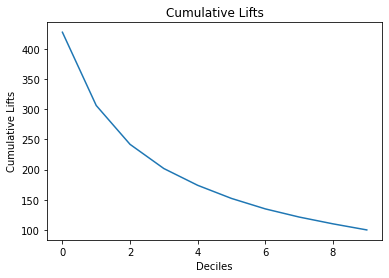

In [ ]:
plt.plot(mba263.lift(data['buyer_dummy'],data['response1']))
plt.title('Cumulative Lifts')
plt.xlabel('Deciles')
plt.ylabel('Cumulative Lifts')

In [ ]:
data['target']=(data['predicted']>0.083)*1

In [ ]:
data['target']

0        0
1        0
2        0
3        0
4        0
        ..
49995    0
49996    1
49997    1
49998    1
49999    1
Name: target, Length: 50000, dtype: int64

In [ ]:
mba263.tabulate(data['target'])

,Name,Count,Frequency
0,0,34390,0.6878
1,1,15610,0.3122
